# New House Price Prediction using Linear Regression 

- **Aim** : To develop a machine learning model using linear regression to predict the monetary value of a new house
- **Dataset Used** : Boston house price dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

## <font color=blue>1. Data Preprocessing</font>

In [2]:
#load boston house dataset
boston = load_boston()

#dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#put the data into pandas dataframe
features = pd.DataFrame(boston.data, columns = boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#set target dataframe
target = pd.DataFrame(boston.target, columns = ['target'])
target.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
#concat features and target into one single dataset
#use axis = 1 to concat columnwise
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#summary of dataset
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [7]:
#find correlation among columns
corr = df.corr(method="pearson")
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
#take absolute value of correlations
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#make a list of pairs [(corrs, feature)]
l = list(zip(corrs, list(features)))
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [9]:
#sort corrs values in descending order
l.sort(key = lambda x : x[0], reverse = True)

#unzip pairs into two lists
corrs, labels = list(zip(*l))

print(corrs, labels)

(0.7376627261740143, 0.6953599470715389, 0.507786685537561, 0.483725160028373, 0.46853593356776646, 0.4273207723732817, 0.3883046085868114, 0.3816262306397776, 0.3769545650045959, 0.3604453424505447, 0.33346081965706653, 0.24992873408590394, 0.1752601771902975) ('LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS')


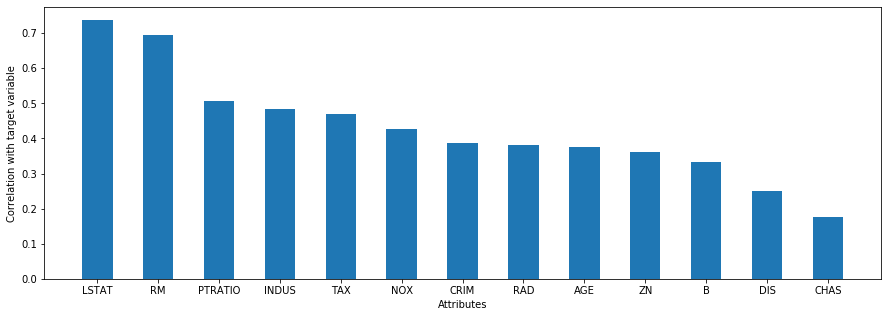

In [10]:
#plot corrs values with target values as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width = 0.5)
plt.xlabel("Attributes")
plt.ylabel("Correlation with target variable")
plt.xticks(index, labels)
plt.show()

## <font color=blue>2. Normalize the data</font>
Normalize the data with MinMaxScaler()

In [11]:
X = df['LSTAT'].values
Y = df['target'].values

In [12]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1))
X = X[:,-1]

y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:,-1]

## <font color=blue>3. Splitting the data </font>
- **Split the data into training and testing data** : The data is split before the training step and the samples in the sets of data do not change during the course of training process

### Splitting data into fixed sets

In [13]:
# test data = 20 % of whole data and rest is training data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

## <font color=blue>4. Build the model</font>
### The three functions that constitue the model are :
- error : This function returns the mean squared error in the predicted values for given m and c
- update : This function changes the values of m and c
- gradient_descent : This function implements gradient descent

MSE : If a vector of n predictions is generated from a sample of n data points on all variables, and Y is the vector of observed values of the variable being predicted, then MSE of the predictor is computed as - 

<font size=3px><center>**_mean squared error_** = (1/n) * <font size=5px>&Sigma;</font> ( Y - Yi ) ^ 2</center></font>

### Define error 

In [14]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return e * 1/(2 * N)

Hypothesis : <center>y = mx + c</center>

### Equation to update weights
<font size=3px><center> **gradient_m** = <font size=5px>&Sigma;</font> ( 2 * ((m * x + c) - t ) * x )</center></font>
<font size=3px><center> **gradient_c** = <font size=5px>&Sigma;</font> ( 2 * ((m * x + c) - t ))</center></font>
<center> m = m - gradient_m * learning_rate</center>
<center> c = c - gradient_c * learning_rate</center>

### Define update function 

In [15]:
# grad_m and grad_c are calculated as vectorized operations
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * x * ((m * x + c) - t))
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

### Define gradient descent function

**Error Threshold** : If the error falls below threshold then gradient descent process is stopped

In [16]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e<error_threshold:
            print("\nError reached below threshold. Stopping grading descent")
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

### Initializing parameters
The values can be varied to observe the computation vs accuracy trade-offs

- **Learning rate** : Very low value means learning will take a long time and very high implies higher chances of shooting off minima
- **Iterations** : Number of iterations must be large enough to allow the model to converge to a minima, but if it is too large then the model becomes too specific to the training data thus causing 'overfitting' i.e. the model memorizes the data instead of learning it 
- **Error threshold** : If the error falls below threshold then gradient descent process is stopped
- **Initial values** : In this case it doesn't matter what initial values we are providing

In [17]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 146 ms


Final m and c values learned by linear regression model

In [18]:
print(m, c)

-0.8197809538032776 0.6404568513800443


## Visualization of the learning process
- **Plot the regression line** against the training data to visualize what the line looks for the training data set
- **Plot the error values** : this graph shows how the error drops over time

### Plotting regression line upon the training data set 

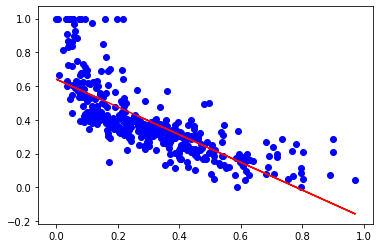

In [19]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m * xtrain + c), color='r')

### Plotting error values

Text(0.5, 0, 'Iterations')

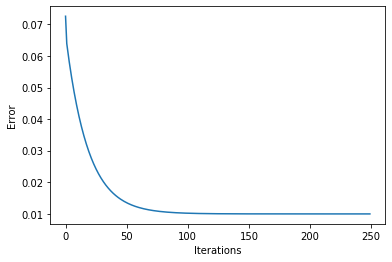

In [20]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

### Animation to observe change in prediction error

In [21]:
# # To save processing time select few points over an interval from mc_values
# mc_values_anim = mc_values[0:250:5] #selecting every 5th value

In [22]:
# fig, ax = plt.subplots()
# ln, = plt.plot([], [], 'ro-', animated = True)

# def init():
#     plt.scatter(xtest, ytest, color='g')
#     ax.set_xlim(0, 1.0)
#     ax.set_ylim(0, 1.0)
#     return ln,

# def update_frame(frame):
#     m, c = mc_values_anim[frame]
#     x1, y1 = -0.5, m * -0.5 + c
#     x2, y2 = 1.5, m * 1.5 + c
#     ln.set_data([x1,x2],[y1,y2])
#     return ln,

# anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)), init_func = init, blit = True)

# HTML(anim.to_html5_video())    

## <font color=blue>5. Prediction</font>

Ater step 4 we obtain the m and c values learned by the model. We use these values to predict the target for the test data. After that we evaluate the model using metrics such as MSE.

In [23]:
# Calculate the predictions on the test set as vectorized operations
predicted = (m * xtest + c)

In [24]:
# Compute MSE
mean_squared_error(ytest, predicted)

0.01630115033742805

In [25]:
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x','target_y','predicted_y'])

### Plotting the predicted values against the target values

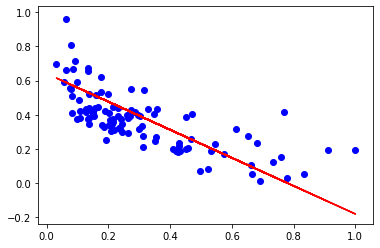

In [26]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

### Revert normalization to obtain the predicted price of the houses in $1000

In [27]:
# Reshape data as required by scaler
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

# remove extra dimension
xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns = ['x (LSTAT)','target_house_price (in $1000)','predicted_house_price (in $1000)'])
p = p.round(decimals = 2)
p.head()

,x (LSTAT),target_house_price (in $1000),predicted_house_price (in $1000)
0,17.28,14.8,17.99
1,7.14,23.2,28.31
2,31.99,7.4,3.02
3,14.59,17.1,20.73
4,16.94,13.5,18.34
